In [2]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 8.0/8.0 MB 39.2 MB/s eta 0:00:00
     ---------------------------------------- 188.2/188.2 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 68.6 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 103.2/103.2 kB ? eta 0:00:00


In [7]:
pip install -U scikit-learn

     --------------------------------------- 11.0/11.0 MB 65.5 MB/s eta 0:00:00
     --------------------------------------- 44.7/44.7 MB 46.9 MB/s eta 0:00:00
     ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
data = pd.read_csv('realtor-data.zip.csv')

In [3]:
data.sample(15)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1137150,78270.0,for_sale,595000.0,4.0,3.0,0.13,1632343.0,Arvada,Colorado,80003.0,2351.0,2021-11-15
108871,14077.0,for_sale,1950000.0,3.0,3.0,NaN,950215.0,New York,New York,10075.0,2100.0,NaN
1662589,37718.0,sold,349900.0,3.0,2.0,0.26,1441609.0,Port Orange,Florida,32127.0,1974.0,2021-11-22
1307837,53652.0,for_sale,569000.0,3.0,3.0,0.04,1592652.0,Ventura,California,93003.0,1259.0,2017-10-20
927485,16291.0,for_sale,199900.0,2.0,2.0,15.00,1421875.0,Proctor,Oklahoma,74457.0,1524.0,NaN
2212977,50377.0,sold,159950.0,1.0,1.0,NaN,1050788.0,Puyallup,Washington,98371.0,NaN,2022-02-25
506025,30807.0,for_sale,95000.0,1.0,1.0,NaN,753515.0,West Palm Beach,Florida,33417.0,570.0,NaN
460544,105522.0,for_sale,320000.0,3.0,2.0,0.16,976349.0,Deltona,Florida,32725.0,1649.0,NaN
1295754,59477.0,for_sale,499000.0,5.0,3.0,2.06,97777.0,Apple Valley,California,92308.0,2069.0,2010-07-06
1178581,69848.0,for_sale,289000.0,NaN,NaN,5.05,1961489.0,Spirit Lake,Idaho,83869.0,NaN,NaN


In [4]:
print(data.shape)


(2226382, 12)


In [5]:
data.info()
nan_values = data.isna().sum()
print("NaN: ", nan_values)

duplicated_values = data.duplicated().sum()
print("duplicated: ", duplicated_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
NaN:  brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64
duplicated:  0


In [6]:
data.dropna(inplace=True)
data.sample(15)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
741018,66565.0,for_sale,160000.0,6.0,2.0,0.08,1227566.0,Detroit,Michigan,48210.0,2450.0,2013-06-12
1832394,30768.0,sold,389900.0,3.0,3.0,0.17,1809778.0,Eden Prairie,Minnesota,55347.0,2010.0,2021-12-15
1463302,15328.0,sold,699900.0,5.0,3.0,0.29,1763369.0,Toms River,New Jersey,8757.0,3400.0,2021-11-30
1936139,31934.0,sold,799000.0,3.0,2.0,0.31,1803755.0,Dallas,Texas,75218.0,2052.0,2022-03-08
2091365,102447.0,sold,995000.0,3.0,2.0,0.10,986075.0,Ladera Ranch,California,92694.0,2149.0,2022-03-22
1339634,72154.0,for_sale,494000.0,3.0,2.0,0.27,774869.0,Galt,California,95632.0,1770.0,2009-03-13
2011212,14090.0,sold,678733.0,4.0,3.0,1.00,1528886.0,Casa Grande,Arizona,85194.0,2375.0,2022-03-31
793262,85932.0,for_sale,110000.0,2.0,1.0,0.18,292082.0,Appleton,Wisconsin,54915.0,720.0,2007-06-01
1900935,271.0,sold,189900.0,4.0,2.0,0.15,1729869.0,Oklahoma City,Oklahoma,73169.0,1904.0,2022-02-15
616130,103866.0,for_sale,459900.0,3.0,4.0,10.01,593242.0,McMinnville,Tennessee,37110.0,2048.0,2018-12-18


In [7]:
print(data.shape)

(1084909, 12)


In [8]:
state_counts = data.groupby('state').size().reset_index()
print(state_counts)

                   state       0
0                Alabama    9519
1                 Alaska     291
2                Arizona   50269
3               Arkansas    8185
4             California  157724
5               Colorado   15219
6            Connecticut    6312
7               Delaware    4856
8   District of Columbia    2508
9                Florida  107570
10               Georgia   42384
11                Hawaii    2899
12                 Idaho    9162
13              Illinois   38473
14               Indiana    5888
15                  Iowa   12747
16                Kansas    6722
17              Kentucky   10868
18             Louisiana    8266
19                 Maine     373
20              Maryland   30527
21         Massachusetts   24866
22              Michigan   14806
23             Minnesota   27553
24           Mississippi    2271
25              Missouri   20675
26               Montana    2963
27              Nebraska    2995
28                Nevada    7054
29        

In [9]:
city_counts = data.groupby('city').size().reset_index()
print(city_counts)

                city   0
0         Aaronsburg   2
1          Abbeville  49
2         Abbotsford  12
3             Abbott   1
4        Abbottstown  22
...              ...  ..
15098  Zolfo Springs  16
15099   Zumbro Falls   9
15100       Zumbrota  27
15101           Zuni   1
15102         Zwolle  16

[15103 rows x 2 columns]


In [10]:
data['zip_code'] = data['zip_code'].astype(str)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084909 entries, 502 to 2226381
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1084909 non-null  float64
 1   status          1084909 non-null  object 
 2   price           1084909 non-null  float64
 3   bed             1084909 non-null  float64
 4   bath            1084909 non-null  float64
 5   acre_lot        1084909 non-null  float64
 6   street          1084909 non-null  float64
 7   city            1084909 non-null  object 
 8   state           1084909 non-null  object 
 9   zip_code        1084909 non-null  object 
 10  house_size      1084909 non-null  float64
 11  prev_sold_date  1084909 non-null  object 
dtypes: float64(7), object(5)
memory usage: 107.6+ MB


In [12]:
state_median_prices = data.groupby('state')['price'].median().reset_index()
state_median_prices_sorted = state_median_prices.sort_values(by='price')

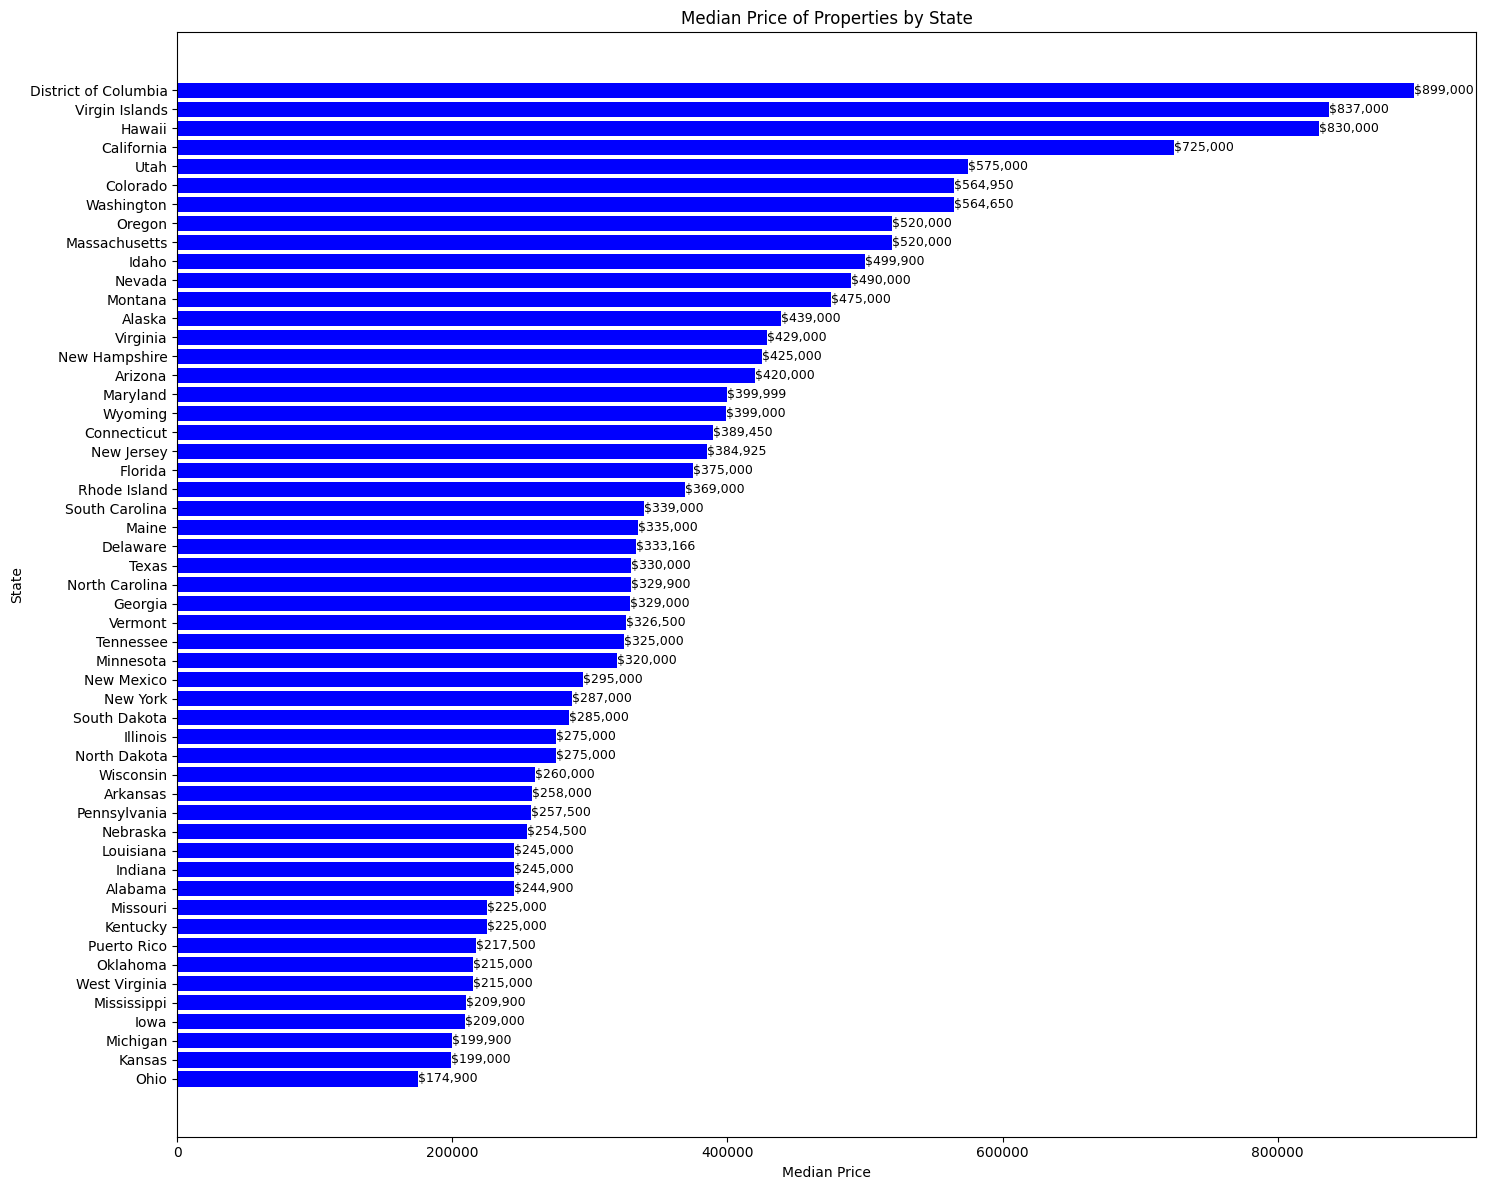

In [13]:
plt.figure(figsize=(15, 12))
bars = plt.barh(state_median_prices_sorted['state'], state_median_prices_sorted['price'], color='blue')
for bar, price in zip(bars, state_median_prices_sorted['price']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${price:,.0f}', 
             va='center', ha='left', fontsize=9)

plt.xlabel('Median Price')
plt.ylabel('State')
plt.title('Median Price of Properties by State')
plt.tight_layout()
plt.show()

In [14]:
city_median_prices = data.groupby('city')['price'].median().reset_index()
city_median_prices_sorted = city_median_prices.sort_values(by='price', ascending=False).head(20)

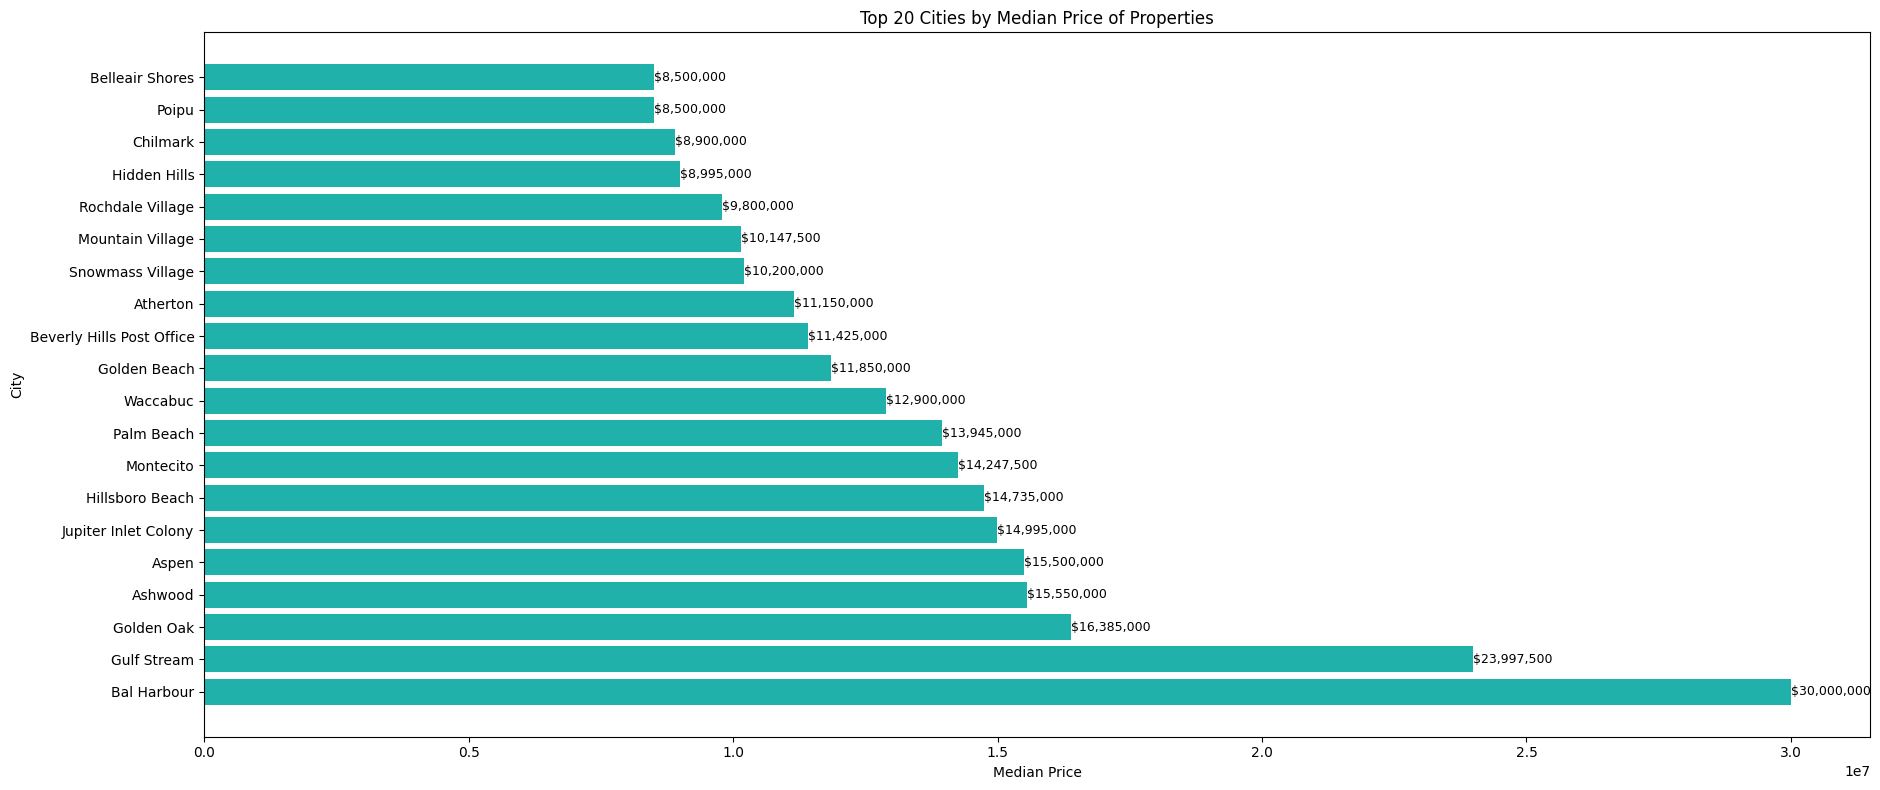

In [15]:
plt.figure(figsize=(19, 8))
bars = plt.barh(city_median_prices_sorted['city'], city_median_prices_sorted['price'], color='lightseagreen')

for bar, price in zip(bars, city_median_prices_sorted['price']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${price:,.0f}', 
             va='center', ha='left', fontsize=9)

plt.xlabel('Median Price')
plt.ylabel('City')
plt.title('Top 20 Cities by Median Price of Properties')
plt.tight_layout()
plt.show()

In [16]:
size_df = data[['price', 'bed', 'bath', 'acre_lot', 'house_size']]
correlation_matrix = size_df.corr()
print(correlation_matrix)

               price       bed      bath  acre_lot  house_size
price       1.000000  0.205024  0.373092  0.000815    0.187705
bed         0.205024  1.000000  0.685355 -0.000250    0.239807
bath        0.373092  0.685355  1.000000 -0.001426    0.316937
acre_lot    0.000815 -0.000250 -0.001426  1.000000   -0.000010
house_size  0.187705  0.239807  0.316937 -0.000010    1.000000


In [17]:
selected_state = 'New York'

In [18]:
selected_df = data[data['state'] == selected_state]

In [19]:
selected_df.sample()
print(selected_df.shape)

(38883, 12)


In [20]:
city_median_prices = selected_df.groupby('city')['price'].median().reset_index()
city_median_prices_sorted = city_median_prices.sort_values(by='price', ascending=False).head(30)

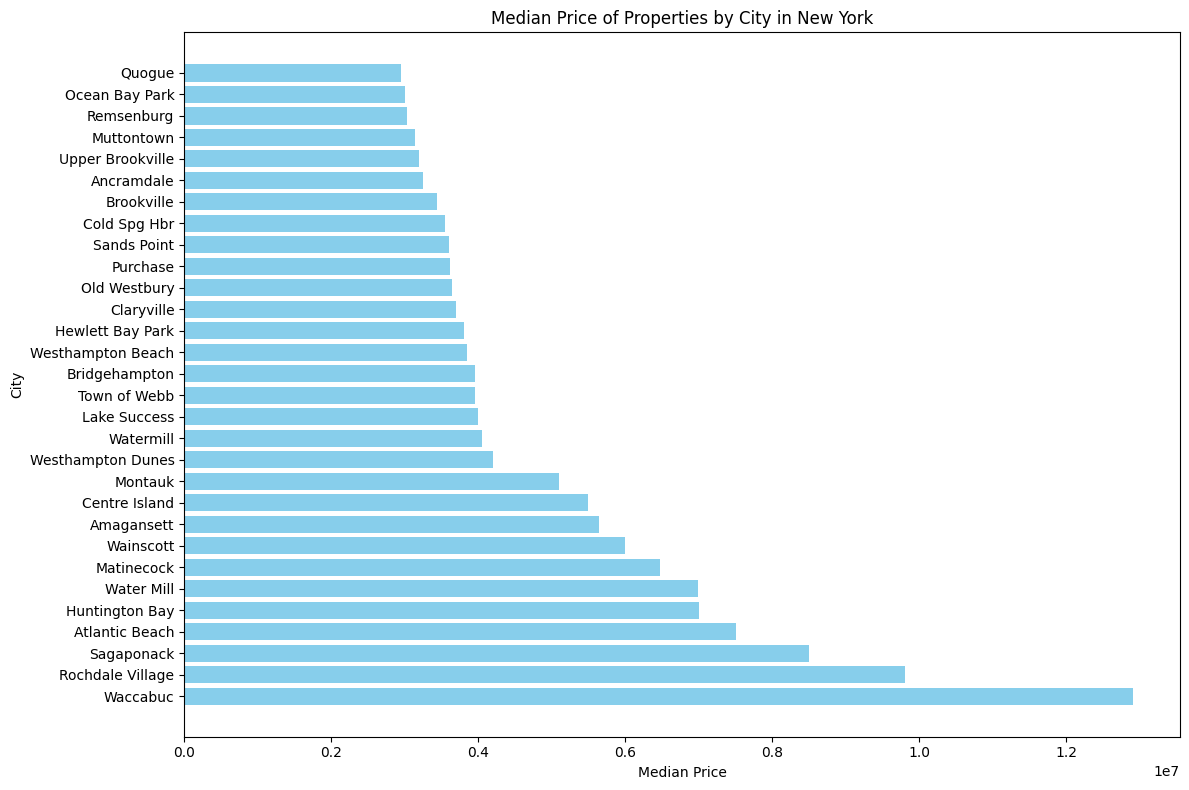

In [21]:
plt.figure(figsize=(12, 8))
plt.xlabel('Median Price')
plt.ylabel('City')
plt.barh(city_median_prices_sorted['city'], city_median_prices_sorted['price'], color='skyblue')
plt.title(f'Median Price of Properties by City in {selected_state}')
plt.tight_layout()
plt.show()

In [22]:
selected_df.sample(20)
selected_numerical = selected_df[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

In [23]:
X = selected_numerical[['bed', 'bath', 'acre_lot', 'house_size']]
y = selected_numerical['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))

Accuracy of LinearRegression on test set: 0.32


In [25]:
model = RandomForestRegressor().fit(X_train,y_train)
predictions = model.predict(X_test)

print('Mean Absolute Error',mean_absolute_error(y_test,predictions))
print('R2 Scroe',r2_score(y_test,predictions))

Mean Absolute Error 330197.7888170086
R2 Scroe 0.48998111240359965


In [26]:
selected_sold = selected_df[selected_df['status'] == 'sold']

In [27]:
X = selected_sold[['bed', 'bath', 'acre_lot', 'house_size']]
y = selected_sold['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))

Accuracy of LinearRegression on test set: 0.26


In [29]:
model = RandomForestRegressor().fit(X_train,y_train)
predictions = model.predict(X_test)

print('Mean Absolute Error',mean_absolute_error(y_test,predictions))
print('R2 Scroe',r2_score(y_test,predictions))

Mean Absolute Error 228659.5752950888
R2 Scroe 0.313034021669891
